In [ ]:
import zipfile

# Specify the path to the zip file
zip_path = "/content/drive/MyDrive/UCF_and_Shanghai.zip"

# Specify the path to the directory where you want to extract the dataset
target_dir = '/content/data'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

In [ ]:
!git clone https://github.com/seominseok0429/Real-world-Anomaly-Detection-in-Surveillance-Videos-pytorch
!git clone https://github.com/Hamza-t/Real-world-Anomaly-Detection-in-Surveillance-Videos-with-CNN-RNN.git

Cloning into 'Real-world-Anomaly-Detection-in-Surveillance-Videos-pytorch'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 46 (delta 15), reused 13 (delta 13), pack-reused 25
Receiving objects: 100% (46/46), 8.64 MiB | 12.14 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Cloning into 'Real-world-Anomaly-Detection-in-Surveillance-Videos-with-CNN-RNN'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 2.93 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the zip file
zip_path = "/content/drive/MyDrive/Real-world-Anomaly-Detection-in-Surveillance-Videos-pytorch.zip"

# Specify the path to the directory where you want to extract the dataset
target_dir = '/content/code'
# !$DATA_ROOT_DIR./workspace/DATA/UCF-Crime/all_rgbs
# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

# Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import random

class Normal_Loader(Dataset):
    """
    is_train = 1 <- train, 0 <- test
    """
    def __init__(self, is_train=1, path='/content/data/UCF-Crime', modality='TWO'):
        super(Normal_Loader, self).__init__()
        self.is_train = is_train
        self.modality = modality
        self.path = path
        if self.is_train == 1:
            data_list = os.path.join(path, 'train_normal.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
        else:
            data_list = os.path.join(path, 'test_normalv2.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
            random.shuffle(self.data_list)
            self.data_list = self.data_list[:-10]
    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if self.is_train == 1:
            rgb_npy = np.load(os.path.join(self.path+'/'+'all_rgbs', self.data_list[idx][:-1]+'.npy'))
            flow_npy = np.load(os.path.join(self.path+'/'+'all_flows', self.data_list[idx][:-1]+'.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            if self.modality == 'RGB':
                return rgb_npy
            elif self.modality == 'FLOW':
                return flow_npy
            else:
                return concat_npy
        else:
            name, frames, gts = self.data_list[idx].split(' ')[0], int(self.data_list[idx].split(' ')[1]), int(self.data_list[idx].split(' ')[2][:-1])
            rgb_npy = np.load(os.path.join(self.path+'/'+'all_rgbs', name + '.npy'))
            flow_npy = np.load(os.path.join(self.path+'/'+'all_flows', name + '.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            if self.modality == 'RGB':
                return rgb_npy, gts, frames
            elif self.modality == 'FLOW':
                return flow_npy, gts, frames
            else:
                return concat_npy, gts, frames

class Anomaly_Loader(Dataset):
    """
    is_train = 1 <- train, 0 <- test
    """
    def __init__(self, is_train=1, path='/content/data/UCF-Crime', modality='TWO'):
        super(Anomaly_Loader, self).__init__()
        self.is_train = is_train
        self.modality = modality
        self.path = path
        if self.is_train == 1:
            data_list = os.path.join(path, 'train_anomaly.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
        else:
            data_list = os.path.join(path, 'test_anomalyv2.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if self.is_train == 1:
            rgb_npy = np.load(os.path.join(self.path+'/'+'all_rgbs', self.data_list[idx][:-1]+'.npy'))
            flow_npy = np.load(os.path.join(self.path+'/'+'all_flows', self.data_list[idx][:-1]+'.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            if self.modality == 'RGB':
                return rgb_npy
            elif self.modality == 'FLOW':
                return flow_npy
            else:
                return concat_npy
        else:
            name, frames, gts = self.data_list[idx].split('|')[0], int(self.data_list[idx].split('|')[1]), self.data_list[idx].split('|')[2][1:-2].split(',')
            gts = [int(i) for i in gts]
            rgb_npy = np.load(os.path.join(self.path+'/'+'all_rgbs', name + '.npy'))
            flow_npy = np.load(os.path.join(self.path+'/'+'all_flows', name + '.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            if self.modality == 'RGB':
                return rgb_npy, gts, frames
            elif self.modality == 'FLOW':
                return flow_npy, gts, frames
            else:
                return concat_npy, gts, frames

if __name__ == '__main__':
    # loader = Anomaly_Loader(is_train=1)
    loader2 = Normal_Loader(is_train=0)
    print(len(loader2))
    # print(loader[0], loader2[1])z

140


# Learn

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class Learner(nn.Module):
    def __init__(self, input_dim=2048, drop_p=0.0):
        super(Learner, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(drop_p),
            nn.Linear(512, 32),
            nn.ReLU(),
            nn.Dropout(drop_p),
            nn.Linear(32, 1),
            nn.Sigmoid())

        self.drop_p = drop_p
        self.weight_init()
        self.vars = nn.ParameterList()

        for i, param in enumerate(self.classifier.parameters()):
            self.vars.append(param)

    def weight_init(self):
        for layer in self.classifier:
            if type(layer) == nn.Linear:
                nn.init.xavier_normal_(layer.weight)

    def forward(self, x, vars=None):
        if vars is None:
            vars = self.vars
        x = F.linear(x, vars[0], vars[1])
        x = F.relu(x)
        x = F.dropout(x, self.drop_p, training=self.training)
        x = F.linear(x, vars[2], vars[3])
        x = F.dropout(x, self.drop_p, training=self.training)
        x = F.linear(x, vars[4], vars[5])
        return torch.sigmoid(x)

    def parameters(self):
        """
        override this function since initial parameters will return with a generator.
        :return:
        """
        return self.vars

# Learn2

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class Learner2(nn.Module):
    def __init__(self, input_dim=2048, drop_p=0.0):
        super(Learner2, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(drop_p),
            nn.Linear(512, 32),
            nn.ReLU(),
            nn.Dropout(drop_p),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        self.drop_p = drop_p
        self.weight_init()
        self.vars = nn.ParameterList()
        self.filter1 = nn.LayerNorm(input_dim)

        for i, param in enumerate(self.classifier.parameters()):
            self.vars.append(param)

    def weight_init(self):
        for layer in self.classifier:
            if type(layer) == nn.Linear:
                nn.init.xavier_normal_(layer.weight)

    def forward(self, x, vars=None):
        if vars is None:
            vars = self.vars

        x1 = F.linear(x, vars[0], vars[1])
        x1 = F.relu(x1)
        x1 = F.dropout(x1, self.drop_p, training=self.training)
        x1 = F.linear(x1, vars[2], vars[3])
        x1 = F.dropout(x1, self.drop_p, training=self.training)
        x1 = F.linear(x1, vars[4], vars[5])

        x = self.relu(self.filter1(x))
        x2 = F.linear(x, vars[0], vars[1])
        x2 = F.relu(x2)
        x2 = F.dropout(x2, self.drop_p, training=self.training)
        x2 = F.linear(x2, vars[2], vars[3])
        x2 = F.dropout(x2, self.drop_p, training=self.training)
        x2 = F.linear(x2, vars[4], vars[5])

        x = (x1 + x2)/2.

        return torch.sigmoid(x)

    def parameters(self):
        """
        override this function since initial parameters will return with a generator.
        :return:
        """
        return self.vars

# FFC

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class Learner2(nn.Module):
    def __init__(self, input_dim=2048, drop_p=0.0):
        super(Learner2, self).__init__()
        self.filter1 = nn.LayerNorm(input_dim)
        self.filter2 = nn.LayerNorm(input_dim)
        self.relu2 = nn.LeakyReLU(negative_slope=0.2, inplace=True)
        self.relu = nn.PReLU()
        self.dropout = nn.Dropout(drop_p)

        self.fc1 = nn.Linear(input_dim, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 256)
        self.fc4 = nn.Linear(256, 32)
        self.fc5 = nn.Linear(32, 1)


    def forward(self, x):
        x1 = self.relu2(x)

        out = self.fc5(self.relu(self.fc4((self.relu(self.fc3(self.dropout(self.relu(self.fc2(self.relu(self.fc1(x)))))))))))
        out2 = self.fc5(self.relu(self.fc4(self.relu(self.fc3(self.dropout(self.relu(self.fc2(self.relu(self.fc1(x1))))))))))
        out = out + out2*0.2
        return torch.sigmoid(out)

# Loss

In [ ]:
import torch
import torch.nn.functional as F

def MIL(y_pred, batch_size, is_transformer=0):
    loss = torch.tensor(0.).cuda()
    loss_intra = torch.tensor(0.).cuda()
    sparsity = torch.tensor(0.).cuda()
    smooth = torch.tensor(0.).cuda()
    if is_transformer==0:
        y_pred = y_pred.view(batch_size, -1)
    else:
        y_pred = torch.sigmoid(y_pred)

    for i in range(batch_size):
        anomaly_index = torch.randperm(30).cuda()
        normal_index = torch.randperm(30).cuda()

        y_anomaly = y_pred[i, :32][anomaly_index]
        y_normal  = y_pred[i, 32:][normal_index]

        y_anomaly_max = torch.max(y_anomaly) # anomaly
        y_anomaly_min = torch.min(y_anomaly)

        y_normal_max = torch.max(y_normal) # normal
        y_normal_min = torch.min(y_normal)

        loss += F.relu(1.-y_anomaly_max+y_normal_max)

        sparsity += torch.sum(y_anomaly)*0.00008
        smooth += torch.sum((y_pred[i,:31] - y_pred[i,1:32])**2)*0.00008
    loss = (loss+sparsity+smooth)/batch_size

    return loss

# Main

In [ ]:
import torch
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import argparse

parser = argparse.ArgumentParser(description='PyTorch MIL Training')
parser.add_argument('--lr', default=0.001, type=float, help='learning rate')
parser.add_argument('--w', default=0.0010000000474974513, type=float, help='weight_decay')
parser.add_argument('--modality', default='TWO', type=str, help='modality')
parser.add_argument('--input_dim', default=2048, type=int, help='input_dim')
parser.add_argument('--drop', default=0.6, type=float, help='dropout_rate')
parser.add_argument('--FFC', '-r', action='store_true',help='FFC')
parser.add_argument('-f')
args = parser.parse_args()

best_auc = 0

normal_train_dataset = Normal_Loader(is_train=1, modality=args.modality)
normal_test_dataset = Normal_Loader(is_train=0, modality=args.modality)

anomaly_train_dataset = Anomaly_Loader(is_train=1, modality=args.modality)
anomaly_test_dataset = Anomaly_Loader(is_train=0, modality=args.modality)

normal_train_loader = DataLoader(normal_train_dataset, batch_size=30, shuffle=True)
normal_test_loader = DataLoader(normal_test_dataset, batch_size=1, shuffle=True)

anomaly_train_loader = DataLoader(anomaly_train_dataset, batch_size=30, shuffle=True)
anomaly_test_loader = DataLoader(anomaly_test_dataset, batch_size=1, shuffle=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if args.FFC:
    model = Learner2(input_dim=args.input_dim, drop_p=args.drop).to(device)
else:
    model = Learner(input_dim=args.input_dim, drop_p=args.drop).to(device)

optimizer = torch.optim.Adagrad(model.parameters(), lr= args.lr, weight_decay=args.w)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50])
criterion = MIL

# Lists to store training loss and AUC values
train_losses = []
auc_values = []

def train(epoch):
    print('\nEpoch: %d' % epoch)
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (normal_inputs, anomaly_inputs) in enumerate(zip(normal_train_loader, anomaly_train_loader)):
        inputs = torch.cat([anomaly_inputs, normal_inputs], dim=1)
        batch_size = inputs.shape[0]
        inputs = inputs.view(-1, inputs.size(-1)).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, batch_size)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Append the training loss to the list
    train_losses.append(train_loss / len(normal_train_loader))
    print('loss =', train_losses[-1])
    scheduler.step()

def test_abnormal(epoch):
    model.eval()
    global best_auc
    auc = 0
    precision = 0
    recall = 0
    f1_score = 0
    confusion_matrix = np.zeros((2, 2))

    with torch.no_grad():
        for i, (data, data2) in enumerate(zip(anomaly_test_loader, normal_test_loader)):
            inputs, gts, frames = data
            inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
            score = model(inputs)
            score = score.cpu().detach().numpy()
            score_list = np.zeros(frames[0])
            step = np.round(np.linspace(0, frames[0] // 16, 33))

            for j in range(32):
                score_list[int(step[j]) * 16:(int(step[j + 1])) * 16] = score[j]

            gt_list = np.zeros(frames[0])
            for k in range(len(gts) // 2):
                s = gts[k * 2]
                e = min(gts[k * 2 + 1], frames)
                gt_list[s - 1:e] = 1

            inputs2, gts2, frames2 = data2
            inputs2 = inputs2.view(-1, inputs2.size(-1)).to(torch.device('cuda'))
            score2 = model(inputs2)
            score2 = score2.cpu().detach().numpy()
            score_list2 = np.zeros(frames2[0])
            step2 = np.round(np.linspace(0, frames2[0] // 16, 33))
            for kk in range(32):
                score_list2[int(step2[kk]) * 16:(int(step2[kk + 1])) * 16] = score2[kk]
            gt_list2 = np.zeros(frames2[0])
            score_list3 = np.concatenate((score_list, score_list2), axis=0)
            gt_list3 = np.concatenate((gt_list, gt_list2), axis=0)

            fpr, tpr, thresholds = metrics.roc_curve(gt_list3, score_list3, pos_label=1)
            auc += metrics.auc(fpr, tpr)

            # Calculate precision, recall, and F1 score
            score_final = [1 if i >= 0.5 else 0 for i in score_list3]
            precision += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1, zero_division=1)[0][0]
            recall += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1, zero_division=1)[1][0]
            f1_score += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1, zero_division=1)[2][0]

            confusion_matrix += metrics.confusion_matrix(y_true=gt_list3, y_pred=score_final)

    auc_values.append(auc / 140)
    print('auc =', auc_values[-1])
    # print('precision =', precision / 140)
    # print('recall =', recall / 140)
    # print('f1_score =', f1_score / 140)
    # print('confusion_matrix =', confusion_matrix / 140)

    if best_auc < auc / 140:
        print('Saving..')
        state = {
            'net': model.state_dict(),
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_auc = auc / 140

    return auc_values[-1], precision / 140, recall / 140, f1_score / 140, confusion_matrix / 140, fpr, tpr


auc_vector = []
precision_vector = []
recall_vector = []
f1_score_vector = []
confusion_matrix_vector = []
fpr_vector = []
tpr_vector = []
for epoch in range(0, 101):
    train(epoch)
    auc_vector, precision, recall, f1_score, confusion_matrix, fpr, tpr = test_abnormal(epoch)
    auc.append(auc)
    precision_vector.append(precision)
    recall_vector.append(recall)
    f1_score_vector.append(f1_score)
    confusion_matrix_vector.append(confusion_matrix)
    fpr_vector.append(fpr)
    tpr_vector.append(tpr)


# Plotting the training loss and AUC values
# Continue with the rest of your code...



Epoch: 0
loss = 0.9628591493323997
auc = 0.7988299726757014
Saving..

Epoch: 1
loss = 0.9086901148160299
auc = 0.801609074243575
Saving..

Epoch: 2
loss = 0.8587743043899536
auc = 0.8149074184532915
Saving..

Epoch: 3
loss = 0.822122386208287
auc = 0.8130144510948474

Epoch: 4
loss = 0.7893273212291576
auc = 0.8197628189690535
Saving..

Epoch: 5
loss = 0.7602905697292752
auc = 0.8148091243350747

Epoch: 6
loss = 0.7221469989529362
auc = 0.8139631473866841

Epoch: 7
loss = 0.7035840352376302
auc = 0.8128209122763602

Epoch: 8
loss = 0.6724765079992788
auc = 0.8199134523202285
Saving..

Epoch: 9
loss = 0.6477917167875502
auc = 0.8252956023755792
Saving..

Epoch: 10
loss = 0.6258875021228084
auc = 0.8167766795045269

Epoch: 11
loss = 0.6093958329271387
auc = 0.8198170219596531

Epoch: 12
loss = 0.5882559584246742
auc = 0.8232379908861072

Epoch: 13
loss = 0.5694423980183072
auc = 0.8199253255521282

Epoch: 14
loss = 0.5631448825200399
auc = 0.8248427913062633

Epoch: 15
loss = 0.53806401

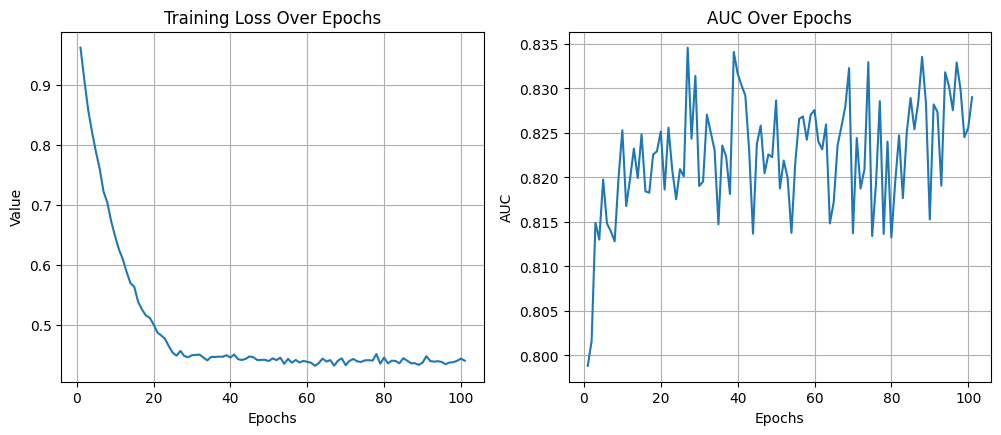

In [ ]:
# Plotting the training loss and AUC values
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(auc_values) + 1), auc_values, label='AUC')
plt.title('AUC Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.grid(True)

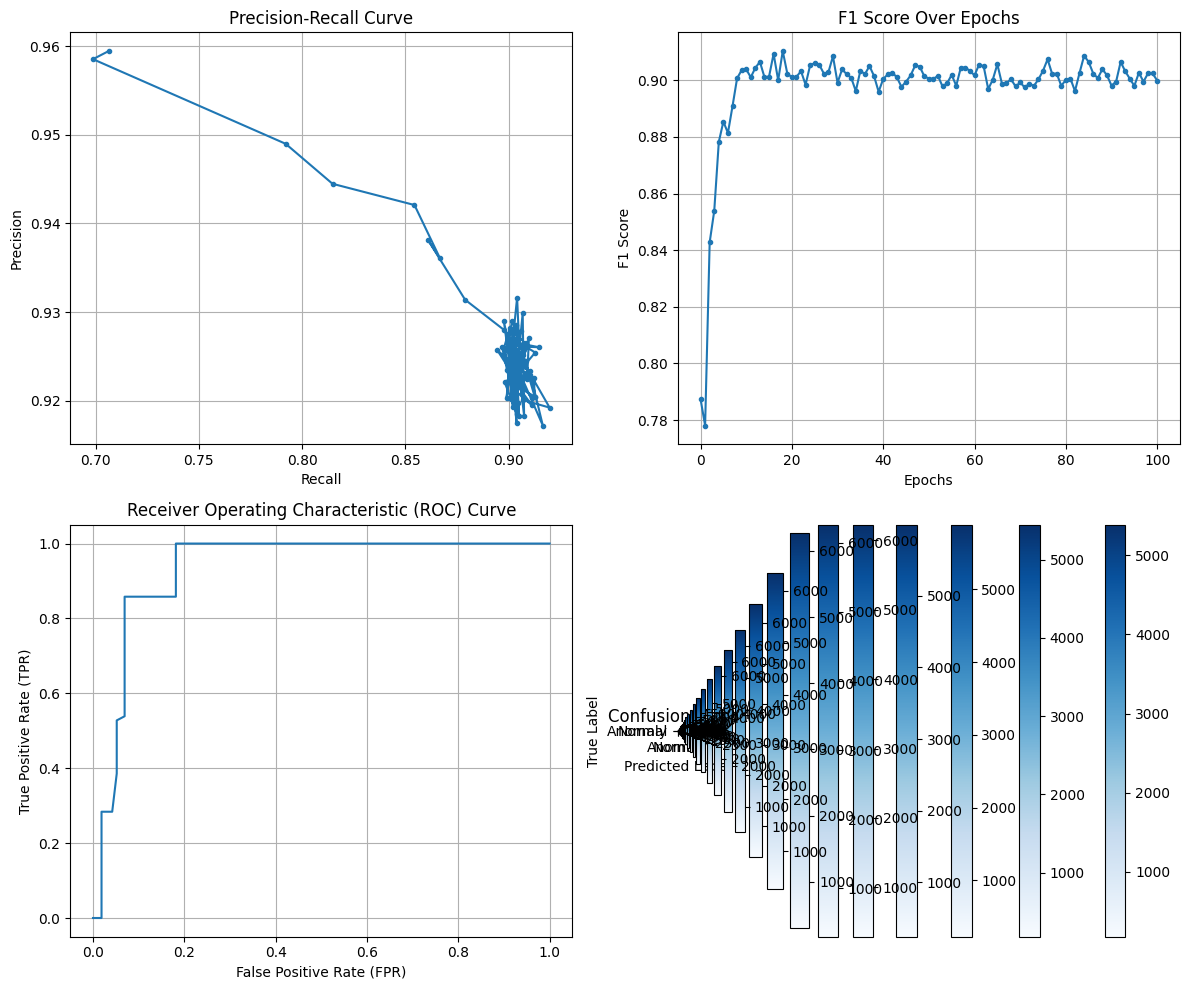

In [ ]:
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)

def plot_f1_score(f1_score):
    plt.subplot(2, 2, 2)
    plt.plot(f1_score, marker='.')
    plt.title('F1 Score Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.grid(True)

def plot_roc_curve(fpr_vector, tpr_vector):
    plt.subplot(2, 2, 3)
    # for fpr, tpr in zip(fpr_vector, tpr_vector):
    #     plt.plot(fpr, tpr, marker='.')
    plt.plot(fpr_vector[-1], tpr_vector[-1], label='ROC Curve')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.grid(True)

def plot_confusion_matrix(confusion_matrix_list):
    plt.subplot(2, 2, 4)
    for matrix in confusion_matrix_list:
        plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        classes = ['Normal', 'Anomaly']
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes)
        plt.yticks(tick_marks, classes)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.grid(False)
        # plt.show()


plot_precision_recall_curve(precision_vector, recall_vector)
plot_f1_score(f1_score_vector)
plot_roc_curve(fpr_vector, tpr_vector)
plot_confusion_matrix(confusion_matrix_vector)

plt.tight_layout()
plt.show()

# test

In [ ]:
from torch.utils.data import DataLoader
import os
from sklearn import metrics
import argparse
# from FFC import *

parser = argparse.ArgumentParser(description='PyTorch MIL Training')
parser.add_argument('--lr', default=0.001, type=float, help='learning rate')
parser.add_argument('--w', default=0.0010000000474974513, type=float, help='weight_decay')
parser.add_argument('--modality', default='TWO', type=str, help='modality')
parser.add_argument('--input_dim', default=2048, type=int, help='input_dim')
parser.add_argument('--drop', default=0.6, type=float, help='dropout_rate')
parser.add_argument('--FFC', '-r', action='store_true',help='FFC')
parser.add_argument('-f')
args = parser.parse_args()

best_auc = 0

normal_test_dataset = Normal_Loader(is_train=0, modality=args.modality)

anomaly_test_dataset = Anomaly_Loader(is_train=0, modality=args.modality)

normal_test_loader = DataLoader(normal_test_dataset, batch_size=1, shuffle=False)

anomaly_test_loader = DataLoader(anomaly_test_dataset, batch_size=1, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'


if args.FFC:
    model = Learner2(input_dim=args.input_dim, drop_p=args.drop).to(device)
else:
    model = Learner(input_dim=args.input_dim, drop_p=args.drop).to(device)

checkpoint = torch.load('/content/checkpoint/ckpt.pth')
model.load_state_dict(checkpoint['net'])

def test_abnormal():
    model.eval()
    global best_auc
    auc = 0
    with torch.no_grad():
        for i, (data, data2) in enumerate(zip(anomaly_test_loader, normal_test_loader)):
            inputs, gts, frames = data
            inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
            score = model(inputs)
            score = score.cpu().detach().numpy()
            score_list = np.zeros(frames[0])
            step = np.round(np.linspace(0, frames[0]//16, 33))

            for j in range(32):
                score_list[int(step[j])*16:(int(step[j+1]))*16] = score[j]

            gt_list = np.zeros(frames[0])
            for k in range(len(gts)//2):
                s = gts[k*2]
                e = min(gts[k*2+1], frames)
                gt_list[s-1:e] = 1

            inputs2, gts2, frames2 = data2
            inputs2 = inputs2.view(-1, inputs2.size(-1)).to(torch.device('cuda'))
            score2 = model(inputs2)
            score2 = score2.cpu().detach().numpy()
            score_list2 = np.zeros(frames2[0])
            step2 = np.round(np.linspace(0, frames2[0]//16, 33))
            for kk in range(32):
                score_list2[int(step2[kk])*16:(int(step2[kk+1]))*16] = score2[kk]
            gt_list2 = np.zeros(frames2[0])
            score_list3 = np.concatenate((score_list, score_list2), axis=0)
            gt_list3 = np.concatenate((gt_list, gt_list2), axis=0)

            fpr, tpr, thresholds = metrics.roc_curve(gt_list3, score_list3, pos_label=1)
            auc += metrics.auc(fpr, tpr)

        print('auc = {}',auc/140)

        if best_auc < auc/140:
            print('Saving..')
            state = {
                'net': model.state_dict(),
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            torch.save(state, './checkpoint/ckpt.hdf5')
            best_auc = auc/140

test_abnormal()

auc = {} 0.8126605868111477
Saving..


# Try to make a a function for testing the model in real time but the memory crah

In [ ]:
!git clone https://github.com/craston/MARS.git

Cloning into 'MARS'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 108 (delta 3), reused 0 (delta 0), pack-reused 95
Receiving objects: 100% (108/108), 44.75 KiB | 2.98 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
!cd MARS

In [ ]:
import cv2
import torch
import numpy as np
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

def predict_realtime(video_path, model, transform=None, change_interval=16):
    cap = cv2.VideoCapture(video_path)

    frame_idx = 0
    last_predicted_class = None

    device = next(model.parameters()).device  # Get the device of the model

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Apply transformation if provided
        if transform:
            frame_rgb = transform(frame_rgb)

        with torch.no_grad():
            # Convert the frame to a tensor and normalize
            input_frame = torch.as_tensor(frame_rgb, dtype=torch.float32).permute(2, 0, 1) / 255.0

            # Add a batch and frame dimension
            input_frame = input_frame.unsqueeze(0).unsqueeze(2)

            # Ensure that the frames have 3 channels (RGB)
            if input_frame.size(1) != 3:
                input_frame = input_frame[:, :3, :, :]

            # Move input to the same device as the model
            input_frame = input_frame.to(device)

            outputs = model(input_frame)
            _, predicted = torch.max(outputs, 1)

        # Convert predicted index to class label
        classes = ["Normal", "Abnormal"]
        predicted_class = classes[predicted.item()]

        # Update last_predicted_class every change_interval frames
        if frame_idx % change_interval == 0:
            last_predicted_class = predicted_class

        # Display frame with prediction and frame number
        cv2.putText(frame, f"Prediction: {last_predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, f"Frame: {frame_idx + 1}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show the frame using matplotlib
        cv2.imshow("frame", frame)

        frame_idx += 1

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
device = "cuda"
if args.FFC:
    model = Learner2(input_dim=args.input_dim, drop_p=args.drop).to(device)
else:
    model = Learner(input_dim=args.input_dim, drop_p=args.drop).to(device)
torch.save({
    'net': model.state_dict(),
}, 'checkpoint/ckpt.pth')
checkpoint_path = '/content/checkpoint/ckpt.pth'
checkpoint = torch.load(checkpoint_path, map_location=torch.device(device))
model.load_state_dict(checkpoint['net'])
model.eval()
video_path = '/content/2023-11-19 12.46.46.mp4'
predict_realtime(video_path, model, transform=ToTensor())

In [ ]:
!cd MARS

/bin/bash: line 1: cd: MARS: No such file or directory


In [ ]:
# adding the repos to the system so you can import functions 
import sys
# append repos to the system
sys.path.append('/content/MARS')
sys.path.append("/content/Real-world-Anomaly-Detection-in-Surveillance-Videos-with-pytorch")
sys.path.append('/content/Real-world-Anomaly-Detection-in-Surveillance-Videos-with-CNN-RNN')
# # import libraries
# import learner
# from models import resnext

In [ ]:
from __future__ import division
import torch
from torch import nn
from models import resnext
import pdb

def generate_model( opt):
    assert opt.model in ['resnext']
    assert opt.model_depth in [101]

    from resnext import get_fine_tuning_parameters
    model = resnext.resnet101(
            num_classes=opt.n_classes,
            shortcut_type=opt.resnet_shortcut,
            cardinality=opt.resnext_cardinality,
            sample_size=opt.sample_size,
            sample_duration=opt.sample_duration,
            input_channels=opt.input_channels,
            output_layers=opt.output_layers)


    model = model.cuda()
    model = nn.DataParallel(model)

    if opt.pretrain_path:
        print('loading pretrained model {}'.format(opt.pretrain_path))
        pretrain = torch.load(opt.pretrain_path)

        assert opt.arch == pretrain['arch']
        model.load_state_dict(pretrain['state_dict'])
        model.module.fc = nn.Linear(model.module.fc.in_features, opt.n_finetune_classes)
        model.module.fc = model.module.fc.cuda()

        parameters = get_fine_tuning_parameters(model, opt.ft_begin_index)
        return model, parameters

    return model, model.parameters()

In [ ]:
from __future__ import division
import torch
from torch.nn import init
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
from functools import partial
import pdb

__all__ = ['ResNeXt', 'resnet50', 'resnet101']


def conv3x3x3(in_planes, out_planes, stride=1):
    # 3x3x3 convolution with padding
    return nn.Conv3d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=1,
        bias=False)


def downsample_basic_block(x, planes, stride):
    out = F.avg_pool3d(x, kernel_size=1, stride=stride)
    zero_pads = torch.Tensor(
        out.size(0), planes - out.size(1), out.size(2), out.size(3),
        out.size(4)).zero_()
    if isinstance(out.data, torch.cuda.FloatTensor):
        zero_pads = zero_pads.cuda()

    out = Variable(torch.cat([out.data, zero_pads], dim=1))

    return out


class ResNeXtBottleneck(nn.Module):
    expansion = 2

    def __init__(self, inplanes, planes, cardinality, stride=1,
                 downsample=None):
        super(ResNeXtBottleneck, self).__init__()
        mid_planes = cardinality * int(planes / 32)
        self.conv1 = nn.Conv3d(inplanes, mid_planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm3d(mid_planes)
        self.conv2 = nn.Conv3d(
            mid_planes,
            mid_planes,
            kernel_size=3,
            stride=stride,
            padding=1,
            groups=cardinality,
            bias=False)
        self.bn2 = nn.BatchNorm3d(mid_planes)
        self.conv3 = nn.Conv3d(
            mid_planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm3d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNeXt(nn.Module):

    def __init__(self,
                 block,
                 layers,
                 sample_size,
                 sample_duration,
                 shortcut_type='B',
                 cardinality=32,
                 num_classes=400,
                 input_channels=3,
                 output_layers=[]):
        self.inplanes = 64
        super(ResNeXt, self).__init__()
        self.conv1 = nn.Conv3d(
            input_channels,
            64,
            kernel_size=7,
            stride=(1, 2, 2),
            padding=(3, 3, 3),
            bias=False)

        self.bn1 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool3d(kernel_size=(3, 3, 3), stride=2, padding=1)
        self.layer1 = self._make_layer(block, 128, layers[0], shortcut_type,
                                       cardinality)
        self.layer2 = self._make_layer(
            block, 256, layers[1], shortcut_type, cardinality, stride=2)
        self.layer3 = self._make_layer(
            block, 512, layers[2], shortcut_type, cardinality, stride=2)
        self.layer4 = self._make_layer(
            block, 1024, layers[3], shortcut_type, cardinality, stride=2)
        last_duration = int(math.ceil(sample_duration / 16))
        last_size = int(math.ceil(sample_size / 32))
        self.avgpool = nn.AvgPool3d(
            (last_duration, last_size, last_size), stride=1)
        self.fc = nn.Linear(cardinality * 32 * block.expansion, num_classes)

        #layer to output on forward pass
        self.output_layers = output_layers

        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                m.weight = nn.init.kaiming_normal_(m.weight, mode='fan_out')
            elif isinstance(m, nn.BatchNorm3d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self,
                    block,
                    planes,
                    blocks,
                    shortcut_type,
                    cardinality,
                    stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            if shortcut_type == 'A':
                downsample = partial(
                    downsample_basic_block,
                    planes=planes * block.expansion,
                    stride=stride)
            else:
                downsample = nn.Sequential(
                    nn.Conv3d(
                        self.inplanes,
                        planes * block.expansion,
                        kernel_size=1,
                        stride=stride,
                        bias=False), nn.BatchNorm3d(planes * block.expansion))

        layers = []
        layers.append(
            block(self.inplanes, planes, cardinality, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, cardinality))

        return nn.Sequential(*layers)

    def forward(self, x):
        #pdb.set_trace()
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)

        x5 = self.avgpool(x4)

        x6 = x5.view(x5.size(0), -1)
        x7 = self.fc(x6)

        if len(self.output_layers) == 0:
            return x7
        else:
            out = []
            out.append(x7)
            for i in self.output_layers:
                if i == 'avgpool':
                    out.append(x6)
                if i == 'layer4':
                    out.append(x4)
                if i == 'layer3':
                    out.append(x3)

        return out

    def freeze_batch_norm(self):
        for name,m in self.named_modules():
            if isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm3d): # PHIL: i Think we can write just  "if isinstance(m, nn._BatchNorm)
                m.eval() # use mean/variance from the training
                m.weight.requires_grad = False
                m.bias.requires_grad = False


def get_fine_tuning_parameters(model, ft_begin_index):
    if ft_begin_index == 0:
        return model.parameters()

    ft_module_names = []
    for i in range(ft_begin_index, 5):
        ft_module_names.append('layer{}'.format(i))
    ft_module_names.append('fc')

    print("Layers to finetune : ", ft_module_names)

    parameters = []
    for k, v in model.named_parameters():
        for ft_module in ft_module_names:
            if ft_module in k:
                parameters.append({'params': v})
                break
        else:
            parameters.append({'params': v, 'lr': 0.0})

    return parameters


def resnet50(**kwargs):
    """Constructs a ResNet-50 model.
    """
    model = ResNeXt(ResNeXtBottleneck, [3, 4, 6, 3], **kwargs)
    return model


def resnet101(**kwargs):
    """Constructs a ResNet-101 model.
    """
    model = ResNeXt(ResNeXtBottleneck, [3, 4, 23, 3], **kwargs)
    return model


def resnet152(**kwargs):
    """Constructs a ResNet-101 model.
    """
    model = ResNeXt(ResNeXtBottleneck, [3, 8, 36, 3], **kwargs)
    return model

In [ ]:
import argparse


def parse_opts():
    parser = argparse.ArgumentParser()
    # Datasets
    parser.add_argument(
        '--frame_dir',
        default='dataset/HMDB51/',
        type=str,
        help='path of jpg files')
    parser.add_argument(
        '--annotation_path',
        default='dataset/HMDB51_labels',
        type=str,
        help='label paths')
    parser.add_argument(
        '--dataset',
        default='HMDB51',
        type=str,
        help='(HMDB51, UCF101, Kinectics)')
    parser.add_argument(
        '--split',
        default=1,
        type=str,
        help='(for HMDB51 and UCF101)')
    parser.add_argument(
        '--modality',
        default='RGB',
        type=str,
        help='(RGB, Flow)')
    parser.add_argument(
        '--input_channels',
        default=3,
        type=int,
        help='(3, 2)')
    parser.add_argument(
        '--n_classes',
        default=400,
        type=int,
        help='Number of classes (activitynet: 200, kinetics: 400, ucf101: 101, hmdb51: 51)')
    parser.add_argument(
        '--n_finetune_classes',
        default=51,
        type=int,
        help=
        'Number of classes for fine-tuning. n_classes is set to the number when pretraining.')
    parser.add_argument(
        '--only_RGB',
        action='store_true',
        help='Extracted only RGB frames')
    parser.set_defaults(only_RGB = False)


    # Model parameters
    parser.add_argument(
        '--output_layers',
        action='append',
        help='layer to output on forward pass')
    parser.set_defaults(output_layers=[])
    parser.add_argument(
        '--model',
        default='resnext',
        type=str,
        help='Model base architecture')
    parser.add_argument(
        '--model_depth',
        default=101,
        type=int,
        help='Number of layers in model')
    parser.add_argument(
        '--resnet_shortcut',
        default='B',
        type=str,
        help='Shortcut type of resnet (A | B)')
    parser.add_argument(
        '--resnext_cardinality',
        default=32,
        type=int,
        help='ResNeXt cardinality')
    parser.add_argument(
        '--ft_begin_index',
        default=4,
        type=int,
        help='Begin block index of fine-tuning')
    parser.add_argument(
        '--sample_size',
        default=112,
        type=int,
        help='Height and width of inputs')
    parser.add_argument(
        '--sample_duration',
        default=16,
        type=int,
        help='Temporal duration of inputs')
    parser.add_argument(
        '--training',
        action='store_true',
        help='training/testing')
    parser.set_defaults(training=True)
    parser.add_argument(
        '--freeze_BN',
        action='store_true',
        help='freeze_BN/testing')
    parser.set_defaults(freeze_BN=False)
    parser.add_argument(
        '--batch_size',
        default=20,
        type=int,
        help='Batch Size')
    parser.add_argument(
        '--n_workers',
        default=4,
        type=int,
        help='Number of workers for dataloader')

    # optimizer parameters
    parser.add_argument(
        '--learning_rate',
        default=0.1,
        type=float,
        help='Initial learning rate (divided by 10 while training by lr scheduler)')
    parser.add_argument(
        '--momentum',
        default=0.9,
        type=float,
        help='Momentum')
    parser.add_argument(
        '--dampening',
        default=0.9,
        type=float,
        help='dampening of SGD')
    parser.add_argument(
        '--weight_decay',
        default=1e-3,
        type=float,
        help='Weight Decay')
    parser.add_argument(
        '--nesterov',
        action='store_true',
        help='Nesterov momentum')
    parser.set_defaults(nesterov=False)
    parser.add_argument(
        '--optimizer',
        default='sgd',
        type=str,
        help='Currently only support SGD')
    parser.add_argument(
        '--lr_patience',
        default=10,
        type=int,
        help='Patience of LR scheduler. See documentation of ReduceLROnPlateau.')
    parser.add_argument(
        '--MARS_alpha',
        default=50,
        type=float,
        help='Weight of Flow augemented MSE loss')
    parser.add_argument(
        '--n_epochs',
        default=400,
        type=int,
        help='Number of total epochs to run')
    parser.add_argument(
        '--begin_epoch',
        default=1,
        type=int,
        help='Training begins at this epoch. Previous trained model indicated by resume_path is loaded.')

    # options for logging
    parser.add_argument(
        '--result_path',
        default='',
        type=str,
        help='result_path')
    parser.add_argument(
        '--MARS',
        action='store_true',
        help='test MARS')
    parser.set_defaults(MARS=False)
    parser.add_argument(
        '--pretrain_path',
        default='',
        type=str,
        help='Pretrained model (.pth)')
    parser.add_argument(
        '--MARS_pretrain_path',
        default='',
        type=str,
        help='Pretrained model (.pth)')
    parser.add_argument(
        '--MARS_resume_path',
        default='',
        type=str,
        help='MARS resume model (.pth)')
    parser.add_argument(
        '--resume_path1',
        default='',
        type=str,
        help='Save data (.pth) of previous training')
    parser.add_argument(
        '--resume_path2',
        default='',
        type=str,
        help='Save data (.pth) of previous training')
    parser.add_argument(
        '--resume_path3',
        default='',
        type=str,
        help='Save data (.pth) of previous training')
    parser.add_argument(
        '--log',
        default=1,
        type=int,
        help='Log training and validation')
    parser.add_argument(
        '--checkpoint',
        default=2,
        type=int,
        help='Trained model is saved at every this epochs.')

    parser.add_argument(
        '--manual_seed', default=1, type=int, help='Manually set random seed')
    parser.add_argument(
        '--random_seed', default=1, type=bool, help='Manually set random seed of sampling validation clip')

    args = parser.parse_args()

    return args

In [ ]:
import torch
import glob
import numpy as np
import os
import subprocess
import opts
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
from models.model import generate_model
import learner
from PIL import Image, ImageFilter

from PIL import Image, ImageFilter, ImageOps, ImageChops
import numpy as np
import torch
import random
import numbers
import pdb
import time
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import argparse
try:
    import accimage
except ImportError:
    accimage = None

import sys
sys.argv=['']
del sys


parser = argparse.ArgumentParser(description='Video Anomaly Detection')
parser.add_argument('--n', default='', type=str, help='file name')
parser.add_argument('-f')
args = parser.parse_args()


class ToTensor(object):

    """Convert a ``PIL.Image`` or ``numpy.ndarray`` to tensor.
    Converts a PIL.Image or numpy.ndarray (H x W x C) in the range
    [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
    """

    def __init__(self, norm_value=255):
        self.norm_value = norm_value

    def __call__(self, pic):
        """
        Args:
            pic (PIL.Image or numpy.ndarray): Image to be converted to tensor.
        Returns:
            Tensor: Converted image.
        """
        if isinstance(pic, np.ndarray):
            # handle numpy array
            img = torch.from_numpy(pic.transpose((2, 0, 1)))
            # backward compatibility
            return img.float().div(self.norm_value)

        if accimage is not None and isinstance(pic, accimage.Image):
            nppic = np.zeros(
                [pic.channels, pic.height, pic.width], dtype=np.float32)
            pic.copyto(nppic)
            return torch.from_numpy(nppic)

        # handle PIL Image
        if pic.mode == 'I':
            img = torch.from_numpy(np.array(pic, np.int32, copy=False))
        elif pic.mode == 'I;16':
            img = torch.from_numpy(np.array(pic, np.int16, copy=False))
        else:
            img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
        # PIL image mode: 1, L, P, I, F, RGB, YCbCr, RGBA, CMYK
        if pic.mode == 'YCbCr':
            nchannel = 3
        elif pic.mode == 'I;16':
            nchannel = 1
        else:
            nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)
        # put it from HWC to CHW format
        # yikes, this transpose takes 80% of the loading time/CPU
        img = img.transpose(0, 1).transpose(0, 2).contiguous()
        if isinstance(img, torch.ByteTensor):
            return img.float().div(self.norm_value)
        else:
            return img

    def randomize_parameters(self):
        pass


class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.sub_(m).div_(s)
        return tensor

    def randomize_parameters(self):
        pass

#############################################################
#                        MAIN CODE                          #
#############################################################
opts = parse_opts()
model, paramerters = generate_model(opts) # feature extractor
classifier = Learner().cuda() # classifier

# Loading model and checkpoint
    # model, parameters = generate_model(opt)
    # if opt.resume_path1:
    #     print('loading checkpoint {}'.format(opt.resume_path1))
    #     checkpoint = torch.load(opt.resume_path1)
    #     assert opt.arch == checkpoint['arch']
    #     model.load_state_dict(checkpoint['state_dict'])
    # model.eval()

checkpoint = torch.load('/content/drive/MyDrive/RGB_Kinetics_16f.pth')
# Assuming checkpoint is a tuple containing the model and other information
model, other_info = checkpoint
# Load the state dict into the model
model.load_state_dict(other_info['state_dict'])
# model.load_state_dict(checkpoint['state_dict'])
checkpoint = torch.load('/content/checkpoint/ckpt.pth')
classifier.load_state_dict(checkpoint['net'])

model.eval()
classifier.eval()

path = args.n + '/*'
save_path = args.n +'_result'
img = glob.glob(path)
img.sort()

segment = len(img)//16
x_value =[i for i in range(segment)]

inputs = torch.Tensor(1, 3, 16, 240, 320)
x_time = [jj for jj in range(len(img))]
y_pred = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for num, i in enumerate(img):
    if num < 16:
        inputs[:,:,num,:,:] = ToTensor(1)(Image.open(i))
        cv_img = cv2.imread(i)
        print(cv_img.shape)
        h,w,_ =cv_img.shape
        cv_img = cv2.putText(cv_img, 'FPS : 0.0, Pred : 0.0', (5,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,200,240), 2)
    else:
        inputs[:,:,:15,:,:] = inputs[:,:,1:,:,:]
        inputs[:,:,15,:,:] = ToTensor(1)(Image.open(i))
        inputs = inputs.cuda()
        start = time.time()
        output, feature = model(inputs)
        feature = F.normalize(feature, p=2, dim=1)
        out = classifier(feature)
        y_pred.append(out.item())
        end = time.time()
        FPS = str(1/(end-start))[:5]
        out_str = str(out.item())[:5]
        print(len(x_value)/len(y_pred))

        cv_img = cv2.imread(i)
        cv_img = cv2.putText(cv_img, 'FPS :'+FPS+' Pred :'+out_str, (5,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,200,240), 2)
        if out.item() > 0.4:
            cv_img = cv2.rectangle(cv_img,(0,0),(w,h), (0,0,255), 3)

    if not os.path.isdir(save_path):
        os.mkdir(save_path)

    path = './'+save_path+'/'+os.path.basename(i)
    cv2.imwrite(path, cv_img)

os.system('ffmpeg -i "%s" "%s"'%(save_path+'/%05d.jpg', save_path+'.mp4'))
plt.plot(x_time, y_pred)
plt.savefig(save_path+'.png', dpi=300)
plt.cla()


# ConvLstm + Lstm 

Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import random

class Normal_Loader(Dataset):
    """
    is_train = 1 <- train, 0 <- test
    """
    def __init__(self, is_train=1, path='/content/data/UCF-Crime'):
        super(Normal_Loader, self).__init__()
        self.is_train = is_train
        self.path = path
        if self.is_train == 1:
            data_list = os.path.join(path, 'train_normal.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
        else:
            data_list = os.path.join(path, 'test_normalv2.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
            random.shuffle(self.data_list)
            self.data_list = self.data_list[:-10]
    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if self.is_train == 1:
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', self.data_list[idx][:-1]+'.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', self.data_list[idx][:-1]+'.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy
        else:
            name, frames, gts = self.data_list[idx].split(' ')[0], int(self.data_list[idx].split(' ')[1]), int(self.data_list[idx].split(' ')[2][:-1])
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', name + '.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', name + '.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy, gts, frames

class Anomaly_Loader(Dataset):
    """
    is_train = 1 <- train, 0 <- test
    """
    def __init__(self, is_train=1, path='/content/data/UCF-Crime'):
        super(Anomaly_Loader, self).__init__()
        self.is_train = is_train
        self.path = path
        if self.is_train == 1:
            data_list = os.path.join(path, 'train_anomaly.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
        else:
            data_list = os.path.join(path, 'test_anomalyv2.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if self.is_train == 1:
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', self.data_list[idx][:-1]+'.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', self.data_list[idx][:-1]+'.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy
        else:
            name, frames, gts = self.data_list[idx].split('|')[0], int(self.data_list[idx].split('|')[1]), self.data_list[idx].split('|')[2][1:-2].split(',')
            gts = [int(i) for i in gts]
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', name + '.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', name + '.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy, gts, frames

if __name__ == '__main__':
    normal_train = Normal_Loader(is_train=1)
    normal_test = Normal_Loader(is_train=0)
    abnormal_train = Anomaly_Loader(is_train=1)
    abnormal_test = Anomaly_Loader(is_train=0)
    print("Number of Normal training : {} and Testing :{}".format(len(normal_train), len(normal_test)))
    print("Number of Abnormal training : {} and Testing :{}".format(len(abnormal_train),  len(abnormal_test)))
    # print(len(loader2))
    # print(loader[1], loader2[1])

Number of Normal training : 810 and Testing :140
Number of Abnormal training : 810 and Testing :140


ConvLstm

In [ ]:
import torch.nn as nn
import torch


class ConvLSTMCell(nn.Module):

    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.

        Parameters
        ----------
        input_dim: int
            Number of channels of input tensor.
        hidden_dim: int
            Number of channels of hidden state.
        kernel_size: (int, int)
            Size of the convolutional kernel.
        bias: bool
            Whether or not to add the bias.
        """

        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))

In [ ]:
import torch.nn.functional as F
import torch

class LearnerCnnLstm(nn.Module):
    def __init__(self, input_dim, lstm_hidden_dim, drop_p=0.0):
        super(LearnerCnnLstm, self).__init__()

        self.drop_p = drop_p

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(p=drop_p),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=drop_p),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

        self.learner_model = Learner()  # Instantiate the Learner model

        # Adding ConvLSTMCell
        self.conv_lstm = ConvLSTMCell(input_dim=256 + 1, hidden_dim=lstm_hidden_dim, kernel_size=(3, 3), bias=True)

    def forward(self, x, vars=None):
        print("Input shape:", x.shape)

        # Commenting out the following line as vars are not used in the forward function
        # if vars is None:
        #     vars = self.vars

        x = x.view(-1, x.size(0) * x.size(1))

        # Apply the classifier from Learner model
        learner_output = self.learner_model(x)

        # Concatenate learner output with the input
        x_combined = torch.cat([x, learner_output], dim=1)

        # Apply the classifier defined in LearnerCnnLstm
        x_combined = self.classifier(x_combined)

        # Apply ConvLSTMCell
        lstm_out = []
        h, c = self.conv_lstm.init_hidden(x_combined.size(0), (x_combined.size(1), x_combined.size(2)))
        for t in range(x_combined.size(1)):
            h, c = self.conv_lstm(x_combined[:, t, :], (h, c))
            lstm_out.append(h)
        lstm_out = torch.stack(lstm_out, dim=1)
        print("Output shape:", x_combined.shape)
        return x_combined.squeeze(dim=2), lstm_out


# Learner

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F



class Learner(nn.Module):
    def __init__(self, input_dim=2048, drop_p=0.0):
        super(Learner, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(512, 32),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        self.drop_p = 0.6
        self.weight_init()
        self.vars = nn.ParameterList()

        for i, param in enumerate(self.classifier.parameters()):
            self.vars.append(param)

    def weight_init(self):
        for layer in self.classifier:
            if type(layer) == nn.Linear:
                nn.init.xavier_normal_(layer.weight)

    def forward(self, x, vars=None):
        if vars is None:
            vars = self.vars
        x = F.linear(x, vars[0], vars[1])
        x = F.relu(x)
        x = F.dropout(x, self.drop_p, training=self.training)
        x = F.linear(x, vars[2], vars[3])
        x = F.dropout(x, self.drop_p, training=self.training)
        x = F.linear(x, vars[4], vars[5])
        return torch.sigmoid(x)

    def parameters(self):
        """
        override this function since initial parameters will return with a generator.
        :return:
        """
        return self.vars




# Loss

In [ ]:
import torch
import torch.nn.functional as F

def MIL(y_pred, batch_size, is_transformer=0):
    loss = torch.tensor(0.) #
    loss_intra = torch.tensor(0.) #
    sparsity = torch.tensor(0.) #
    smooth = torch.tensor(0.) #
    if is_transformer==0:
        y_pred = y_pred.view(batch_size, -1)
    else:
        y_pred = torch.sigmoid(y_pred)

    for i in range(batch_size):
        anomaly_index = torch.randperm(30) #
        normal_index = torch.randperm(30) #

        y_anomaly = y_pred[i, :32][anomaly_index]
        y_normal  = y_pred[i, 32:][normal_index]

        y_anomaly_max = torch.max(y_anomaly) # anomaly
        y_anomaly_min = torch.min(y_anomaly)

        y_normal_max = torch.max(y_normal) # normal
        y_normal_min = torch.min(y_normal)

        loss += F.relu(1.-y_anomaly_max+y_normal_max)

        sparsity += torch.sum(y_anomaly)*0.00008
        smooth += torch.sum((y_pred[i,:31] - y_pred[i,1:32])**2)*0.00008
    loss = (loss+sparsity+smooth)/batch_size

    return loss

# LSTM

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable


class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes  # number of classes
        self.num_layers = num_layers  # number of layers
        self.input_size = input_size  # input size
        self.hidden_size = hidden_size  # hidden state
        self.seq_length = seq_length

        self.lstm = nn.LSTM(1, input_size, hidden_size,
                            num_layers)  # lstm
        self.fc_1 = nn.Linear(512, 32)  # fully connected 1
        self.fc = nn.Linear(32, 1)  # fully connected last layer

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(1, x.size(0), 512))  # hidden state
        c_0 = Variable(torch.zeros(1, x.size(0), 512))  # internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0))  # lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size)  # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out)  # first Dense
        out = self.relu(out)  # relu
        out = self.fc(out)  # Final Output
        return out

    '''
        self.dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(input_size=2048, hidden_size=512, num_layers=2)
        self.fc1 = nn.Linear(in_features=512, out_features=32)
        self.fc2 = nn.Linear(32, 1)


    def forward(self, x):

        h = torch.zeros((2, x.size(0), 512))
        c = torch.zeros((2, x.size(0), 512)) #andi mochkle lena

        #h = torch.randn(2, 0, 512)
        #c = torch.randn(2, 0, 512)
        torch.nn.init.xavier_normal_(h)
        torch.nn.init.xavier_normal_(c)


        out, (hidden, cell) = self.lstm(x, (h, c))
        out = self.dropout(out)
        out = torch.relu_(self.fc1(out[:, -1]))
        out = self.dropout(out)
        out = out.view(-1, 2)
        out = torch.log_softmax(self.fc2(out))

        h_0 = torch.zeros(1, x.size(0), 512)  # hidden state
        c_0 = torch.zeros(1, x.size(0), 512)  # internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0))  # lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size)  # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out)  # first Dense
        out = self.relu(out)  # relu
        out = self.fc(out)  # Final Output
        return out



    def forward(self, x):
        output, _status = self.lstm(x)
        output = output[:, -1, :]
        output = self.fc1(torch.relu(output))
        return output
    '''


# Main_LSTM

In [ ]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    print('GPU is available.')
else:
    print('GPU is not available. Switch runtime type to GPU.')

GPU is available.


In [ ]:
!pip install torch torchvision

In [ ]:
import torch

print(torch.cuda.is_available())


True


In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from google.colab import files
files.download("/content/data/UCF-Crime")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move your model to GPU
model.to(device)

# Move your data to GPU
inputs = inputs.to(device)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
import torch

# Create a tensor on the GPU
tensor_on_gpu = torch.rand(3, 3).cuda()
# Move an existing tensor to the GPU
existing_tensor = torch.rand(3, 3)
tensor_on_gpu = existing_tensor.cuda()

In [ ]:
from torch.utils.data import DataLoader
# from learner import Learner
# from loss import *
from torch.autograd import Variable
# from dataset import *
# from lstm import LSTM1
import torch.nn as nn
import os
from sklearn import metrics
import warnings
import gc
warnings.filterwarnings("ignore")

normal_train_dataset = Normal_Loader(is_train=1)
normal_test_dataset = Normal_Loader(is_train=0)

anomaly_train_dataset = Anomaly_Loader(is_train=1)
anomaly_test_dataset = Anomaly_Loader(is_train=0)

normal_train_loader = DataLoader(normal_train_dataset, batch_size=30, shuffle=True)
normal_test_loader = DataLoader(normal_test_dataset, batch_size=1, shuffle=True)

anomaly_train_loader = DataLoader(anomaly_train_dataset, batch_size=30, shuffle=True)
anomaly_test_loader = DataLoader(anomaly_test_dataset, batch_size=1, shuffle=True)

device = 'cuda'

model = LSTM1(1, 2048, 32, 1, 3).to(device)

learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adagrad(model.parameters(), lr= 0.001, weight_decay=0.0010000000474974513)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50])

criterion = MIL
def train(epoch):
    print('\nEpoch: %d' % epoch)
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (normal_inputs, anomaly_inputs) in enumerate(zip(normal_train_loader, anomaly_train_loader)):
        inputs = torch.cat([anomaly_inputs, normal_inputs], dim=1)
        batch_size = inputs.shape[0]
        inputs = inputs.view(-1, inputs.size(-1)).to(device)
        outputs = model(torch.flatten(inputs))
        loss = criterion(outputs, batch_size)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        gc.collect()
    print('loss = ', train_loss/len(normal_train_loader))
    scheduler.step()

def test_abnormal(epoch):
    model.eval()
    auc = 0
    with torch.no_grad():
        for i, (data, data2) in enumerate(zip(anomaly_test_loader, normal_test_loader)):
            inputs, gts, frames = data

            inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
            score = model(torch.flatten(inputs))
            score = score.cpu().detach().numpy()
            score_list = np.zeros(frames[0])
            step = np.round(np.linspace(0, frames[0]//16, 33))

            for j in range(32):
                score_list[int(step[j])*16:(int(step[j+1]))*16] = score[j]

            gt_list = np.zeros(frames[0])
            for k in range(len(gts)//2):
                s = gts[k*2]
                e = min(gts[k*2+1], frames)
                gt_list[s-1:e] = 1

            inputs2, gts2, frames2 = data2
            inputs2 = inputs2.view(-1, inputs2.size(-1)).to(torch.device('cuda'))
            score2 = model(inputs2)
            score2 = score2.cpu().detach().numpy()
            score_list2 = np.zeros(frames2[0])
            step2 = np.round(np.linspace(0, frames2[0]//16, 33))
            for kk in range(32):
                score_list2[int(step2[kk])*16:(int(step2[kk+1]))*16] = score2[kk]
            gt_list2 = np.zeros(frames2[0])
            score_list3 = np.concatenate((score_list, score_list2), axis=0)
            gt_list3 = np.concatenate((gt_list, gt_list2), axis=0)

            fpr, tpr, thresholds = metrics.roc_curve(gt_list3, score_list3, pos_label=1)
            auc += metrics.auc(fpr, tpr) #False negative !!
            gc.collect()
        print('auc = ', auc/140)

for epoch in range(0, 75):
    train(epoch)
    test_abnormal(epoch)


Epoch: 0


# MAIN_CNN_LSTM

In [ ]:
import numpy as np
from torch.utils.data import DataLoader
# from learner import Learner
# from loss import *
# from dataset import *
# import lstm
# import os
from sklearn import metrics
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

normal_train_dataset = Normal_Loader(is_train=1)
normal_test_dataset = Normal_Loader(is_train=0)

anomaly_train_dataset = Anomaly_Loader(is_train=1)
anomaly_test_dataset = Anomaly_Loader(is_train=0)

normal_train_loader = DataLoader(normal_train_dataset, batch_size=30, shuffle=True)
normal_test_loader = DataLoader(normal_test_dataset, batch_size=1, shuffle=True)

anomaly_train_loader = DataLoader(anomaly_train_dataset, batch_size=30, shuffle=True)
anomaly_test_loader = DataLoader(anomaly_test_dataset, batch_size=1, shuffle=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Learner(input_dim=2048).to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.001, weight_decay=0.0010000000474974513)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50])
criterion = MIL


def train(epoch):
    # print('\nEpoch: %d' % epoch)
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (normal_inputs, anomaly_inputs) in enumerate(zip(normal_train_loader, anomaly_train_loader)):
        inputs = torch.cat([anomaly_inputs, normal_inputs], dim=1)
        batch_size = inputs.shape[0]
        inputs = inputs.view(-1, inputs.size(-1)).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, batch_size)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    # print('loss = ', train_loss / len(normal_train_loader))
    scheduler.step()
    return train_loss / len(normal_train_loader)


def test_abnormal(epoch):
    model.eval()
    matrix = np.zeros((2,2))
    auc = 0
    recall = 0
    precision = 0
    f_score = 0
    with torch.no_grad():
        for i, (data, data2) in enumerate(zip(anomaly_test_loader, normal_test_loader)):
            inputs, gts, frames = data
            inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
            score = model(inputs)
            score = score.cpu().detach().numpy()
            # print(score)
            score_list = np.zeros(frames[0])
            step = np.round(np.linspace(0, frames[0] // 16, 33))

            for j in range(32):
                score_list[int(step[j]) * 16:(int(step[j + 1])) * 16] = score[j]

            gt_list = np.zeros(frames[0])
            for k in range(len(gts) // 2):
                s = gts[k * 2]
                e = min(gts[k * 2 + 1], frames)
                gt_list[s - 1:e] = 1

            inputs2, gts2, frames2 = data2
            inputs2 = inputs2.view(-1, inputs2.size(-1)).to(torch.device('cuda'))
            score2 = model(inputs2)
            score2 = score2.cpu().detach().numpy()
            score_list2 = np.zeros(frames2[0])
            step2 = np.round(np.linspace(0, frames2[0] // 16, 33))
            for kk in range(32):
                score_list2[int(step2[kk]) * 16:(int(step2[kk + 1])) * 16] = score2[kk]
            gt_list2 = np.zeros(frames2[0])
            score_list3 = np.concatenate((score_list, score_list2), axis=0)
            gt_list3 = np.concatenate((gt_list, gt_list2), axis=0)
            # print(len(gt_list3)) #binaire
            # print(len(score_list3)) #non binare
            score_final = [1 if i >= 0.5 else 0 for i in score_list3]
            fpr, tpr, thresholds = metrics.roc_curve(gt_list3, score_list3, pos_label=1)
            matrix += metrics.confusion_matrix(y_true=gt_list3, y_pred=score_final)

            precision += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1)[0][0]
            recall += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1)[1][0]
            f_score += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1)[2][0]
            auc += metrics.auc(fpr, tpr)  # False negative !!
        # print(fpr)
        # print(tpr)
        # print(matrix)
        auc = auc/140
        precision = precision / 140
        recall = recall / 140
        f_score = f_score / 140


        return auc, precision, recall, f_score, fpr, tpr


loss_vector = []
accuracy_vector = []
precision_vector = []
recall_vector = []
f_score_vector = []
fpr_vector = []
tpr_vector = []

for epoch in range(0, 75):
    loss = train(epoch)
    auc, precision, recall, f_score, fpr, tpr = test_abnormal(epoch)

    loss_vector.append(loss)
    accuracy_vector.append(1 - loss)  # Assuming you want accuracy as 1 - loss
    precision_vector.append(precision)
    recall_vector.append(recall)
    f_score_vector.append(f_score)
    fpr_vector.append(fpr)
    tpr_vector.append(tpr)

    # Print training loss and accuracy
    print(f"Epoch: {epoch}, Training Loss: {loss:.4f}, Training Accuracy: {accuracy_vector[-1]:.4f}")


    '''
    loss_vector.append(loss)
    auc_vector.append(auc)
    precision_vector.append(precision)
    recall_vector.append(recall)
    f_score_vector.append(f_score)

data = {'loss': loss_vector,
        'auc': auc_vector,
        'precision': precision_vector,
        'recall': recall_vector,
        'F_score': f_score_vector
        }
df = pd.DataFrame(data)
df.to_csv("pfa.csv")
'''

Epoch: 0, Training Loss: 0.8465, Training Accuracy: 0.1535
Epoch: 1, Training Loss: 0.5908, Training Accuracy: 0.4092
Epoch: 2, Training Loss: 0.4855, Training Accuracy: 0.5145
Epoch: 3, Training Loss: 0.4307, Training Accuracy: 0.5693
Epoch: 4, Training Loss: 0.3974, Training Accuracy: 0.6026
Epoch: 5, Training Loss: 0.3727, Training Accuracy: 0.6273
Epoch: 6, Training Loss: 0.3584, Training Accuracy: 0.6416
Epoch: 7, Training Loss: 0.3409, Training Accuracy: 0.6591
Epoch: 8, Training Loss: 0.3308, Training Accuracy: 0.6692
Epoch: 9, Training Loss: 0.3213, Training Accuracy: 0.6787
Epoch: 10, Training Loss: 0.3143, Training Accuracy: 0.6857
Epoch: 11, Training Loss: 0.3071, Training Accuracy: 0.6929
Epoch: 12, Training Loss: 0.2984, Training Accuracy: 0.7016
Epoch: 13, Training Loss: 0.2931, Training Accuracy: 0.7069
Epoch: 14, Training Loss: 0.2884, Training Accuracy: 0.7116
Epoch: 15, Training Loss: 0.2825, Training Accuracy: 0.7175
Epoch: 16, Training Loss: 0.2787, Training Accurac

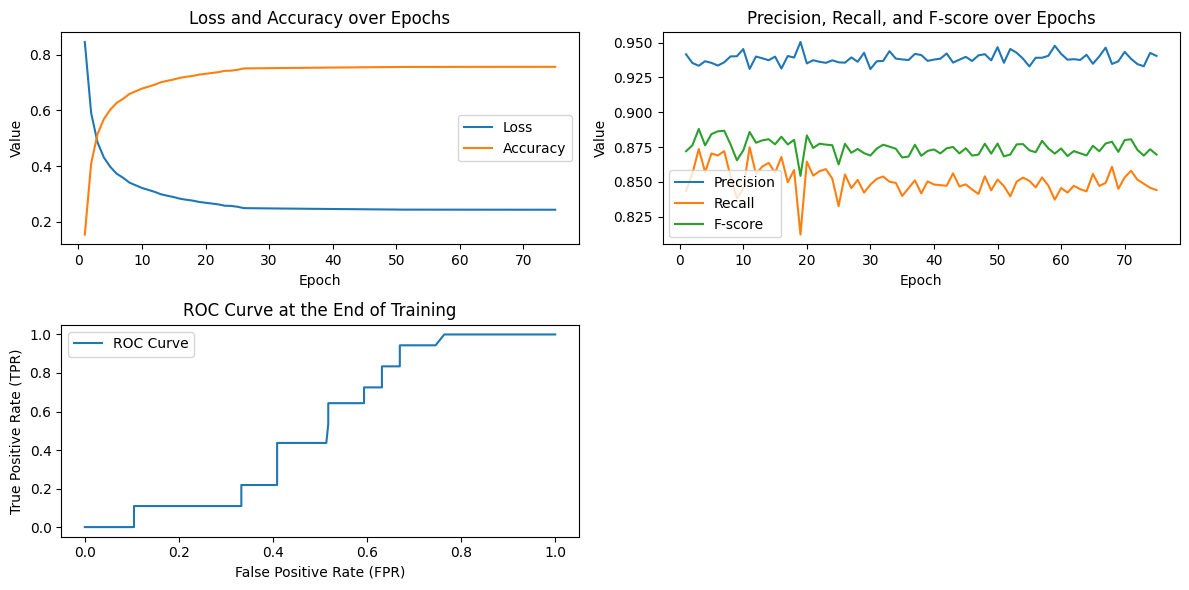

In [ ]:
# Plotting
epochs = list(range(1, 76))  # Assuming 75 epochs
plt.figure(figsize=(12, 6))

# Plotting Loss and Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, loss_vector, label='Loss')
plt.plot(epochs, accuracy_vector, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and Accuracy over Epochs')
plt.legend()

# Plotting Precision, Recall, and F-score
plt.subplot(2, 2, 2)
plt.plot(epochs, precision_vector, label='Precision')
plt.plot(epochs, recall_vector, label='Recall')
plt.plot(epochs, f_score_vector, label='F-score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Precision, Recall, and F-score over Epochs')
plt.legend()

# Plotting FPR and TPR
plt.subplot(2, 2, 3)
plt.plot(fpr_vector[-1], tpr_vector[-1], label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve at the End of Training')
plt.legend()

# # Displaying Confusion Matrix
# plt.subplot(2, 2, 4)
# confusion_matrix = metrics.confusion_matrix(y_true=gt_list3, y_pred=score_final)
# plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()

plt.tight_layout()
plt.show()

# Crash Memmory for for the LSTM 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LearnerCnnLstm(nn.Module):
    def __init__(self, input_dim, lstm_hidden_dim, drop_p=0.0):
        super(LearnerCnnLstm, self).__init__()

        self.drop_p = drop_p

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(p=drop_p),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=drop_p),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

        # Adding ConvLSTMCell
        self.conv_lstm = ConvLSTMCell(input_dim=256, hidden_dim=lstm_hidden_dim, kernel_size=(3, 3), bias=True)

    def forward(self, x, vars=None):
        print("Input shape:", x.shape)

        # Assuming x has shape (batch_size, sequence_length, feature_dim)
        batch_size, sequence_length, feature_dim = x.size()

        # Reshape to (batch_size * sequence_length, feature_dim)
        x = x.view(-1, feature_dim)

        # Apply the classifier
        x = self.classifier(x)

        # Reshape back to (batch_size, sequence_length, 1)
        x = x.view(batch_size, sequence_length, -1)

        # Apply ConvLSTMCell
        lstm_out = []
        h, c = self.conv_lstm.init_hidden(batch_size, (x.size(2), x.size(3)))
        for t in range(x.size(1)):
            h, c = self.conv_lstm(x[:, t, :], (h, c))
            lstm_out.append(h)
        lstm_out = torch.stack(lstm_out, dim=1)
        print("Output shape:", lstm_out.shape)

        # Squeeze the dimension to match BCEWithLogitsLoss input requirements
        return x.squeeze(dim=2), lstm_out


    def parameters(self):
        return list(self.classifier.parameters()) + list(self.conv_lstm.parameters())


In [1]:
import numpy as np
from torch.utils.data import DataLoader
# from learner import Learner
# from loss import *
# from dataset import *
# import lstm
# import os
from sklearn import metrics
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

normal_train_dataset = Normal_Loader(is_train=1)
normal_test_dataset = Normal_Loader(is_train=0)

anomaly_train_dataset = Anomaly_Loader(is_train=1)
anomaly_test_dataset = Anomaly_Loader(is_train=0)

normal_train_loader = DataLoader(normal_train_dataset, batch_size=30, shuffle=True)
normal_test_loader = DataLoader(normal_test_dataset, batch_size=1, shuffle=True)

anomaly_train_loader = DataLoader(anomaly_train_dataset, batch_size=30, shuffle=True)
anomaly_test_loader = DataLoader(anomaly_test_dataset, batch_size=1, shuffle=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

input_dim = 2048  # This is just an example, you should use the appropriate input dimension for your data
lstm_hidden_dim = 32  # You can adjust this value based on your experimentation

model = LearnerCnnLstm(input_dim, lstm_hidden_dim)
learning_rate = 0.001

# optimizer = torch.optim.SGD(model.parameters, lr = learning_rate)
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=0.0010000000474974513)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 50])
criterion =  nn.MSELoss() # nn.MSELoss()

import gc  # Ensure gc is imported
def train(epoch):
    print('\nEpoch: %d' % epoch)
    model.train()
    train_loss = 0
    for batch_idx, (normal_inputs, anomaly_inputs) in enumerate(zip(normal_train_loader, anomaly_train_loader)):
        inputs = torch.cat([anomaly_inputs, normal_inputs], dim=1)
        batch_size = inputs.shape[0]
        inputs = inputs.view(-1, inputs.size(-1)).to(device)

        # Forward pass
        outputs, lstm_out = model(inputs)

        # Assuming your ground truth labels are binary (0 for normal, 1 for anomaly)
        labels = torch.cat([torch.zeros(anomaly_inputs.size(0)), torch.ones(normal_inputs.size(0))]).to(device).view(-1, 1)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        train_loss += loss.item()

        # Manually trigger garbage collection to release GPU memory
        gc.collect()

    # Learning rate scheduler step
    scheduler.step()

    # Return average training loss
    return train_loss / len(normal_train_loader)

# def train(epoch):
#     print('\nEpoch: %d' % epoch)
#     model.train()
#     train_loss = 0
#     correct = 0
#     total = 0
#     for batch_idx, (normal_inputs, anomaly_inputs) in enumerate(zip(normal_train_loader, anomaly_train_loader)):
#         inputs = torch.cat([anomaly_inputs, normal_inputs], dim=1)
#         batch_size = inputs.shape[0]
#         inputs = inputs.view(-1, inputs.size(-1)).to(device)
#         outputs = model(inputs)
#         # probs_flat = probs.view(-1)
#         # targets_flat = targets.view(-1)
#         # return self.crossEntropy_loss(probs_flat, targets_flat)
#         loss = criterion(outputs, batch_size)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()
#         gc.collect()
    # print('loss = ', train_loss / len(normal_train_loader))
    scheduler.step()
    return train_loss / len(normal_train_loader)


def test_abnormal(epoch):
    model.eval()
    matrix = np.zeros((2,2))
    auc = 0
    recall = 0
    precision = 0
    f_score = 0
    with torch.no_grad():
        for i, (data, data2) in enumerate(zip(anomaly_test_loader, normal_test_loader)):
            inputs, gts, frames = data
            inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
            score = model(inputs)
            score = score.cpu().detach().numpy()
            # print(score)
            score_list = np.zeros(frames[0])
            step = np.round(np.linspace(0, frames[0] // 16, 33))

            for j in range(32):
                score_list[int(step[j]) * 16:(int(step[j + 1])) * 16] = score[j]

            gt_list = np.zeros(frames[0])
            for k in range(len(gts) // 2):
                s = gts[k * 2]
                e = min(gts[k * 2 + 1], frames)
                gt_list[s - 1:e] = 1

            inputs2, gts2, frames2 = data2
            inputs2 = inputs2.view(-1, inputs2.size(-1)).to(torch.device('cuda'))
            score2 = model(inputs2)
            score2 = score2.cpu().detach().numpy()
            score_list2 = np.zeros(frames2[0])
            step2 = np.round(np.linspace(0, frames2[0] // 16, 33))
            for kk in range(32):
                score_list2[int(step2[kk]) * 16:(int(step2[kk + 1])) * 16] = score2[kk]
            gt_list2 = np.zeros(frames2[0])
            score_list3 = np.concatenate((score_list, score_list2), axis=0)
            gt_list3 = np.concatenate((gt_list, gt_list2), axis=0)
            # print(len(gt_list3)) #binaire
            # print(len(score_list3)) #non binare
            score_final = [1 if i >= 0.5 else 0 for i in score_list3]
            fpr, tpr, thresholds = metrics.roc_curve(gt_list3, score_list3, pos_label=1)
            matrix += metrics.confusion_matrix(y_true=gt_list3, y_pred=score_final)

            precision += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1)[0][0]
            recall += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1)[1][0]
            f_score += metrics.precision_recall_fscore_support(gt_list3, score_final, pos_label=1)[2][0]
            auc += metrics.auc(fpr, tpr)  # False negative !!
        # print(fpr)
        # print(tpr)
        # print(matrix)
        auc = auc/140
        precision = precision / 140
        recall = recall / 140
        f_score = f_score / 140


        return auc, precision, recall, f_score, fpr, tpr


loss_vector = []
accuracy_vector = []
precision_vector = []
recall_vector = []
f_score_vector = []
fpr_vector = []
tpr_vector = []

for epoch in range(0, 75):
    loss = train(epoch)
    auc, precision, recall, f_score, fpr, tpr = test_abnormal(epoch)

    loss_vector.append(loss)
    accuracy_vector.append(1 - loss)  # Assuming you want accuracy as 1 - loss
    precision_vector.append(precision)
    recall_vector.append(recall)
    f_score_vector.append(f_score)
    fpr_vector.append(fpr)
    tpr_vector.append(tpr)

    # Print training loss and accuracy
    print(f"Epoch: {epoch}, Training Loss: {loss:.4f}, Training Accuracy: {accuracy_vector[-1]:.4f}")


    '''
    loss_vector.append(loss)
    auc_vector.append(auc)
    precision_vector.append(precision)
    recall_vector.append(recall)
    f_score_vector.append(f_score)

data = {'loss': loss_vector,
        'auc': auc_vector,
        'precision': precision_vector,
        'recall': recall_vector,
        'F_score': f_score_vector
        }
df = pd.DataFrame(data)
df.to_csv("pfa.csv")
'''

In [ ]:
for batch in normal_train_dataset:
    print(batch.shape)
    break  # Break after printing the first batch to avoid printing the shapes of all batches

(32, 2048)


In [ ]:
len(normal_test_loader)

140